In [32]:
import pandas as pd
import ssl 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
# Replace 'github_raw_url' with the raw URL of your data file on GitHub
github_raw_url = 'https://raw.githubusercontent.com/rit-public/HappyDB/master/happydb/data/cleaned_hm.csv'

# Use Pandas to read data directly from the URL
df_clean = pd.read_csv(github_raw_url)
df_clean

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection
...,...,...,...,...,...,...,...,...,...
100530,128762,112,24h,My husband announced he is getting a decent bo...,My husband announced he is getting a decent bo...,True,1,NaN,affection
100531,128763,714,24h,Had a can of Pepsi to drink.,Had a can of Pepsi to drink.,True,1,NaN,enjoy_the_moment
100532,128764,3934,24h,Cuddling with my girlfriend last night.,Cuddling with my girlfriend last night.,True,1,affection,affection
100533,128765,1629,24h,I had a great meeting yesterday at work with m...,I had a great meeting yesterday at work with m...,True,1,NaN,bonding


In [3]:
# Replace 'github_raw_url' with the raw URL of your data file on GitHub
github_raw_url = 'https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/demographic.csv'

# Use Pandas to read data directly from the URL
df_demo = pd.read_csv(github_raw_url)
df_demo

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y
...,...,...,...,...,...,...
10839,13835,25.0,USA,m,single,n
10840,13836,31,USA,m,single,y
10841,13837,22.0,USA,f,single,n
10842,13838,38,USA,f,married,y


In [4]:
df_clean[df_clean["predicted_category"] == "exercise"]

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
11,27684,78,24h,I completed my 5 miles run without break. It m...,I completed my 5 miles run without break. It m...,True,2,NaN,exercise
77,27750,35,24h,Going for some running and exercising after th...,Going for some running and exercising after th...,True,1,NaN,exercise
88,27761,1430,24h,After taking some off at the gym(due to illnes...,After taking some off at the gym(due to illnes...,True,1,NaN,exercise
96,27769,76,24h,I went to sportsclub and did running and exerc...,I went to sports club and did running and exer...,False,1,NaN,exercise
...,...,...,...,...,...,...,...,...,...
100111,128338,479,24h,Went for a jog.,Went for a jog.,True,1,exercise,exercise
100140,128367,2844,24h,The final event that made me happy today was h...,The final event that made me happy today was h...,True,1,NaN,exercise
100332,128562,199,24h,I went running.,I went running.,True,1,exercise,exercise
100465,128697,3031,24h,Went Jogging yesterday evening and that made m...,Went Jogging yesterday evening and that made m...,True,1,NaN,exercise


In [5]:
df_processed = pd.merge(df_clean[df_clean["predicted_category"] == "exercise"],df_demo)

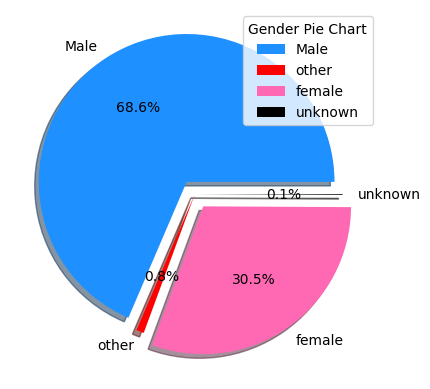

In [7]:
male_value = len(df_processed[df_processed["gender"]=='m'])
female_value = len(df_processed[df_processed["gender"]=='f'])
o_value = len(df_processed[df_processed["gender"]=='o'])
unknown_value = len(df_processed[df_processed["gender"].isna()])
gender_value = np.array([male_value,o_value,female_value,unknown_value])
pie_labels = ["Male", "other", "female", "unknown"]
myexplode = [0.1, 0, 0.1, 0]
mycolors = ["DodgerBlue", "red", "hotpink", "black"]
plt.pie(gender_value,labels = pie_labels,explode = myexplode,shadow = True, colors = mycolors,autopct='%1.1f%%')
plt.legend(title = "Gender Pie Chart")

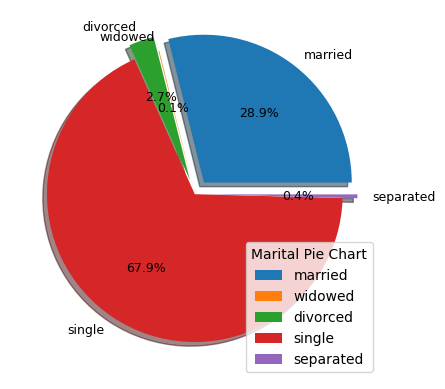

In [8]:
married_value = len(df_processed[df_processed["marital"]=='married'])
widowed_value = len(df_processed[df_processed["marital"]=='widowed'])
divorced_value = len(df_processed[df_processed["marital"]=='divorced'])
separated_value = len(df_processed[df_processed["marital"]=='separated'])
single_value = len(df_processed[df_processed["marital"]=='single'])
marital_value = np.array([married_value,widowed_value,divorced_value,single_value,separated_value])
m_pie_labels = ['married','widowed','divorced','single','separated']
myexplode = [0.1, 0, 0.1, 0, 0.1]
plt.pie(marital_value,labels = m_pie_labels, explode = myexplode,autopct='%1.1f%%',textprops={'fontsize':9},shadow = True)
plt.legend(title = "Marital Pie Chart", loc = "lower right")

In [9]:
values, counts = np.unique(pd.Series(df_processed["age"]), return_counts=True)
male_values,male_counts = np.unique(pd.Series(df_processed[df_processed["gender"]=='m']['age']), return_counts=True)
female_values,female_counts = np.unique(pd.Series(df_processed[df_processed["gender"]=='f']['age']), return_counts=True)

# Convert the values to floats (removing "prefer not to say" in the process)
valid_values = []
valid_counts = []
valid_male_values =[]
valid_male_counts = []
valid_female_values = []
valid_female_counts = []

for value, count in zip(values, counts):
    try:
        age = float(value)
        valid_values.append(age)
        valid_counts.append(count)
    except ValueError:
        pass

for value, count in zip(male_values, male_counts):
    try:
        age = float(value)
        valid_male_values.append(age)
        valid_male_counts.append(count)
    except ValueError:
        pass
for value, count in zip(female_values, female_counts):
    try:
        age = float(value)
        valid_female_values.append(age)
        valid_female_counts.append(count)
    except ValueError:
        pass

valid_values = np.array(valid_values)
valid_counts = np.array(valid_counts)
valid_male_values = np.array(valid_male_values)
valid_female_values = np.array(valid_female_values)
valid_male_counts = np.array(valid_male_counts)
valid_female_counts = np.array(valid_female_counts)

# Define the new age groups
age_groups = [
    (18, 20),
    (21, 30),
    (31, 40),
    (41, 50),
    (51, 60),
    (61, np.max(valid_values))  # The last group includes all remaining ages
]

# Initialize new arrays to store the combined age groups
combined_values = []
combined_counts = []
combined_counts_male = []
combined_counts_female = []

# Combine the age groups
for age_group in age_groups:
    min_age, max_age = age_group
    mask = (valid_values >= min_age) & (valid_values <= max_age)
    male_mask = (valid_male_values >= min_age) & (valid_male_values <= max_age)
    female_mask = (valid_female_values >= min_age) & (valid_female_values <= max_age)

    combined_values.append(f'{min_age}-{max_age}')
    combined_counts.append(np.sum(valid_counts[mask]))
    combined_counts_male.append(np.sum(valid_male_counts[male_mask]))
    combined_counts_female.append(np.sum(valid_female_counts[female_mask]))
# Convert the combined values and counts to NumPy arrays
combined_values = np.array(combined_values)
combined_counts = np.array(combined_counts)

# Print the combined age groups and their counts
for age_group, count in zip(combined_values, combined_counts):
    print(f'Age Group: {age_group}, Count: {count}')


Age Group: 18-20, Count: 38
Age Group: 21-30, Count: 706
Age Group: 31-40, Count: 313
Age Group: 41-50, Count: 95
Age Group: 51-60, Count: 31
Age Group: 61-83.0, Count: 18


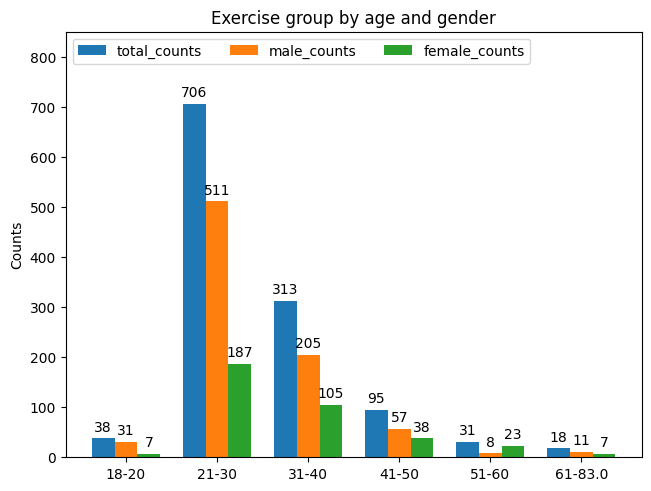

In [10]:
combined_values
datax = {'total_counts': combined_counts,
        'male_counts': combined_counts_male,
        "female_counts": combined_counts_female}

x = np.arange(len(combined_values))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in datax.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Exercise group by age and gender')
ax.set_xticks(x + width, combined_values)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 850)

plt.show()

In [35]:
data_counts = df_processed['country'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
# Create basic choropleth map
fig = px.choropleth(data_counts, locations='country', color='count',
                    projection='natural earth', title='The Number of person excerise')
fig.show()